### TASK-02 : DATA CLEANING & EDA

### IMPORTING NECESSARY LIBRARIES 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

### LOADING THE DATASET

In [6]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Data Understanding

In [8]:
print(df.head())
print("\n Data Shape:",df.shape)
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

 

### Check Missing Values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### HANDLING MISSING VALUES

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
print("\n Missing values after cleaning :\n",df.isnull().sum())


 Missing values after cleaning :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### EXPLORATORY DATA ANALYSIS 

#### 1. SURVIVAL COUNT

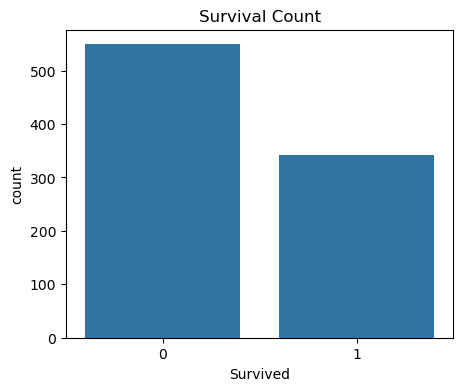

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

#### 2. SURVIVAL RATE BY GENDER

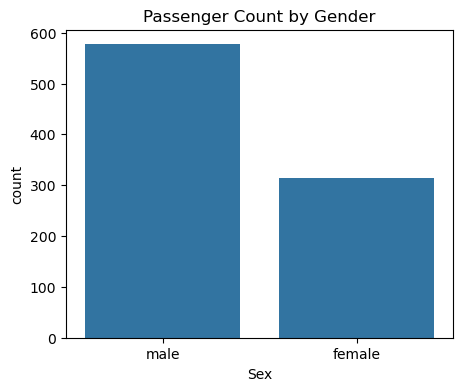

In [74]:
plt.figure(figsize=(5,4))
sns.countplot(x='Sex', data=df)
plt.title("Passenger Count by Gender")
plt.show()


#### 3. SURVIVAL RATE BY PASSENGER CLASS

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16904\215566321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


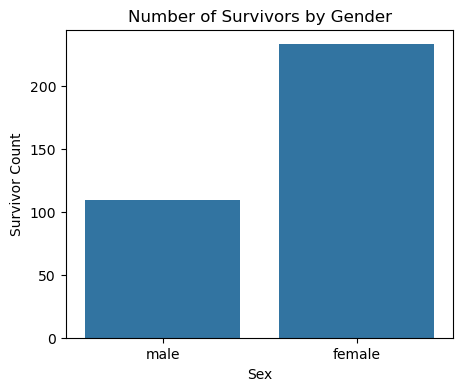

In [86]:
plt.figure(figsize=(5,4))
sns.barplot(
    x='Sex',
    y='Survived',
    data=df,
    estimator=sum,
    ci=None
)
plt.title("Number of Survivors by Gender")
plt.ylabel("Survivor Count")
plt.show()


#### 4. AGE DISTRIBUTION

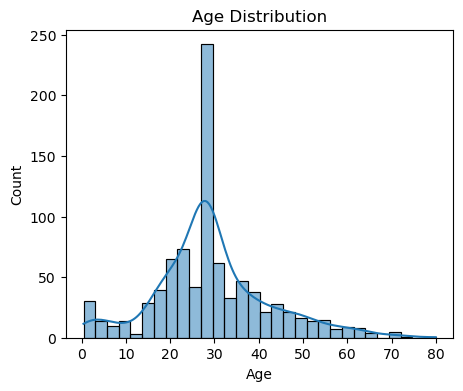

In [48]:
plt.figure(figsize=(5,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#### 5. CORRELATION HEATMAP

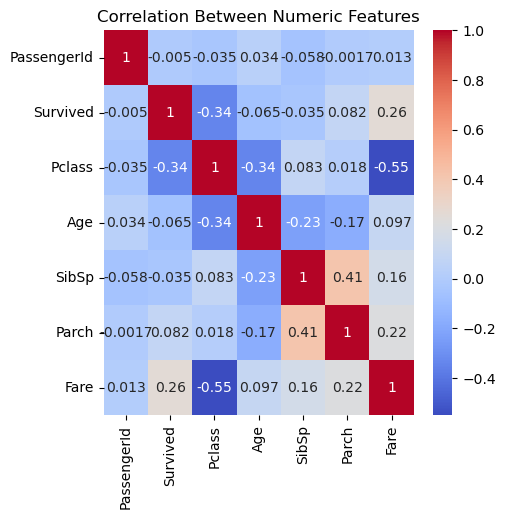

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()